In [1]:
#Import the usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

# Non-Parametric Statistics

## Mann Whitney

In [2]:
hat = pd.concat([pd.Series(data = ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No','Yes','Yes', 'No','Yes','Yes','No','Yes','No','Yes','No','No','No','Yes'],name = 'Wearing Hat'),
                pd.Series(data = [70,85,80,45,80,70,90,70,55,80,75,60,70,85,80,85,55,75,65,70], name ='Score')],axis = 1)

In [3]:
hat

,Wearing Hat,Score
0,Yes,70
1,No,85
2,Yes,80
3,Yes,45
4,No,80
5,No,70
6,No,90
7,Yes,70
8,Yes,55
9,No,80


Text(0, 0.5, 'Frequency')

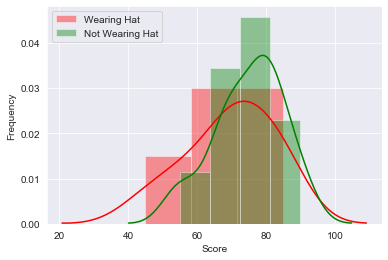

In [4]:
sns.set_style('darkgrid')
sns.distplot(hat[hat['Wearing Hat'] == 'Yes']['Score'], color = 'red', label = 'Wearing Hat')
sns.distplot(hat[hat['Wearing Hat'] == 'No']['Score'], color = 'green', label ='Not Wearing Hat')
plt.legend()
plt.ylabel('Frequency')

The distribution is seems to follow the Normal Distribution, let's try use the Independent T-Test from the Scipy

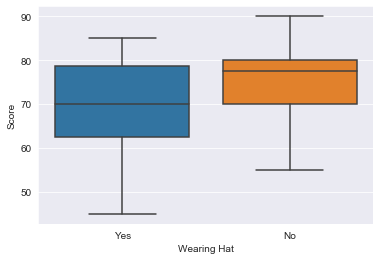

In [5]:
sns.boxplot(x = 'Wearing Hat', y = 'Score', data = hat)

Ho : Median Popolation of Score not wearing hat = Median Popolation of Score wearing hat 
<br>
Ha : Median Popolation of Score not wearing hat > Median Popolation of Score wearing hat

In [6]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(
    hat[hat['Wearing Hat'] == 'No']['Score'], 
    hat[hat['Wearing Hat'] == 'Yes']['Score'],
    alternative = 'greater' # M (no hat) > M (no hat)
))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 61.5
P-Value: 0.1996116335589066


The P-value is higher than our significant level 0.05, it means we don't have enough evidence to reject the Null Hypothesis. So, Mean Popolation Median of Score not wearing hat are still aproximately equal to Mean Popolation Median of Score wearing hat.